In [2]:
import numpy as np
import pandas as pd

In [49]:
df = pd.read_excel("Data_4.xlsx")

In [105]:
df.head()

,unsullen.id,production.date,report.date,produced,defects,supplier
0,1,1,1,103,0,harpy.co
1,1,1,2,0,2,harpy.co
2,1,1,3,0,4,harpy.co
3,1,1,4,0,5,harpy.co
4,1,1,5,0,13,harpy.co


In [33]:
df.tail(30)

,unsullen.id,production.date,report.date,produced,defects,supplier
2670,99,5,7,0,10,westeros.inc
2671,99,6,6,104,0,westeros.inc
2672,99,6,7,0,10,westeros.inc
2673,100,1,1,109,0,westeros.inc
2674,100,1,2,0,9,westeros.inc
2675,100,1,3,0,9,westeros.inc
2676,100,1,4,0,10,westeros.inc
2677,100,1,5,0,7,westeros.inc
2678,100,1,6,0,14,westeros.inc
2679,100,1,7,0,7,westeros.inc


# Так как столбец defects не является неубывающим, то можно сделать вывод, что в нем содержатся новые записи за каждый месяц. То есть их можно суммировать.

In [31]:
df.sample(5)

,unsullen.id,production.date,report.date,produced,defects,supplier
2457,92,1,1,108,0,westeros.inc
2521,94,2,5,0,13,westeros.inc
565,21,6,6,109,0,harpy.co
1667,62,4,6,0,9,westeros.inc
470,18,2,6,0,14,harpy.co


In [106]:
df.shape

(2700, 6)

In [12]:
df["unsullen.id"].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])

In [13]:
df["production.date"].unique()

array([1, 2, 3, 4, 5, 6])

In [14]:
df["report.date"].unique()

array([1, 2, 3, 4, 5, 6, 7])

In [15]:
df["produced"].unique()

array([103,   0, 105, 108, 110, 102, 104, 101, 109, 106, 107])

In [16]:
df["defects"].unique()

array([ 0,  2,  4,  5, 13, 11, 16,  3,  1, 15, 10, 14,  9, 18, 12, 20, 17,
        8, 19,  7,  6, -1])

In [110]:
df['supplier'].value_counts()

harpy.co        1350
westeros.inc    1350
Name: supplier, dtype: int64

In [111]:
df["defects"].value_counts()

 0     617
 3     310
 2     288
 8     217
 9     182
 7     148
 4     141
 10    129
 11    119
 6     105
 5      99
 12     59
 1      58
 14     56
 13     51
 16     46
 15     42
 17     16
 18     12
 20      2
 19      2
-1       1
Name: defects, dtype: int64

# Видим в дефектах значение "-1" - 

In [107]:
df.loc[df['defects'] == -1]
#df.drop(1463, inplace=True)
#df.loc[df['defects'] == -1]


,unsullen.id,production.date,report.date,produced,defects,supplier
1463,55,1,6,0,-1,westeros.inc


# Судя по строке, оно не должно влиять на наш ответ, для соблюдения порядка не будем дропать эту строку, если что, можем добавить 1 в конце рассчетов

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2700 entries, 0 to 2699
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   unsullen.id      2700 non-null   int64 
 1   production.date  2700 non-null   int64 
 2   report.date      2700 non-null   int64 
 3   produced         2700 non-null   int64 
 4   defects          2700 non-null   int64 
 5   supplier         2700 non-null   object
dtypes: int64(5), object(1)
memory usage: 126.7+ KB


In [19]:
df.isnull().sum()


unsullen.id        0
production.date    0
report.date        0
produced           0
defects            0
supplier           0
dtype: int64

# Пропущенных значений не обнаружено

# Визуальный анализ

In [112]:
import matplotlib.pyplot as plt


In [78]:
defects_ = [0] * 100
for i in range(50):
    defects_[i] = df.loc[(df['supplier'] == 'harpy.co')& (df['unsullen.id'] == i+1), 'defects'].sum()
for i in range(50,100):
    defects_[i] = df.loc[(df['supplier'] == 'westeros.inc')& (df['unsullen.id'] == i+1) , 'defects'].sum()


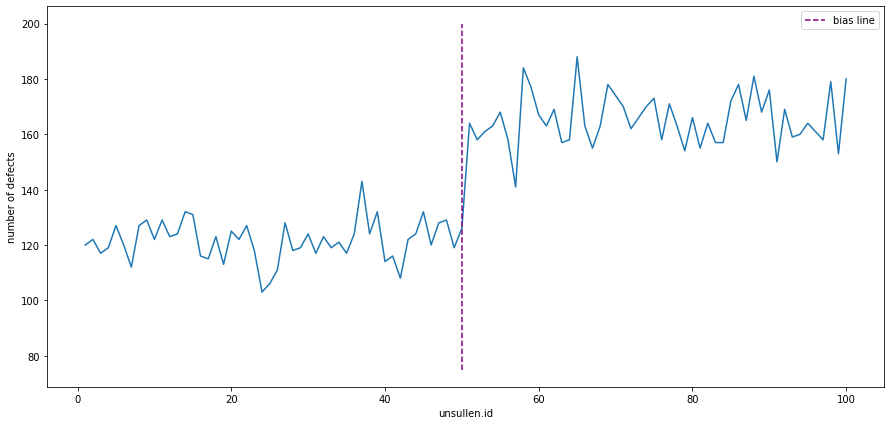

In [102]:
plt.figure(figsize=(15, 7))
plt.plot(df["unsullen.id"].unique(), defects_)
plt.vlines(x=[50], ymin=75, ymax=200, colors='purple', ls='--',label = 'bias line')

plt.xlabel('unsullen.id')
plt.ylabel('number of defects')
plt.legend(bbox_to_anchor=(1.0, 1), loc='best')

plt.show()


In [81]:
produced_ = [0] * 100
for i in range(50):
    produced_[i] = df.loc[(df['supplier'] == 'harpy.co')& (df['unsullen.id'] == i+1), 'produced'].sum()
for i in range(50,100):
    produced_[i] = df.loc[(df['supplier'] == 'westeros.inc')& (df['unsullen.id'] == i+1) , 'produced'].sum()


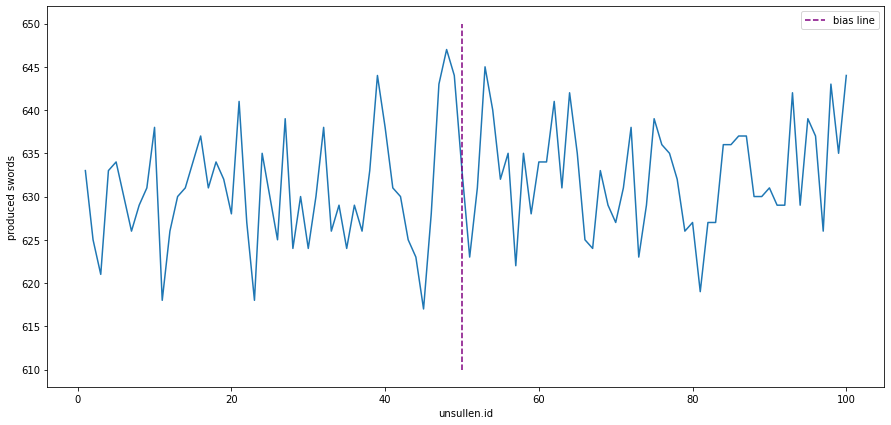

In [101]:
plt.figure(figsize=(15, 7))

plt.plot(df["unsullen.id"].unique(), produced_)
plt.vlines(x=[50], ymin=610, ymax=650, colors='purple', ls='--',label = 'bias line')
plt.xlabel('unsullen.id')
plt.ylabel('produced swords')
plt.legend(bbox_to_anchor=(1.0, 1), loc='best')

plt.show()


# Видно, что количество брака в вестеросе больше, убедимся, посчитав аналитически:

# Посчитаем напрямую

In [108]:
harpy_def = df.loc[df['supplier'] == 'harpy.co', 'defects'].sum()
harpy_prod = df.loc[df['supplier'] == 'harpy.co', 'produced'].sum()
westeros_def = df.loc[df['supplier'] == 'westeros.inc', 'defects'].sum()
westeros_prod = df.loc[df['supplier'] == 'westeros.inc', 'produced'].sum()


In [113]:
harpy_prod/westeros_prod

0.9970592885375494

# Количество мечей почти равно

In [74]:
harpy_def/harpy_prod

0.19281999238868452

In [75]:
westeros_def/westeros_prod

0.2614387351778656

# Лучше выбрать harpy.co